In [1]:
from hamming_dist import *

/var/folders/dv/fpf7xq8j6yzfxjs7g9c_bbyc0000gn/T/ipykernel_37949/3308333545.py:11: DeprecationWarning: loadtxt(): Parsing an integer via a float is deprecated.  To avoid this warning, you can:
    * make sure the original data is stored as integers.
    * use the `converters=` keyword argument.  If you only use
      NumPy 1.23 or later, `converters=float` will normally work.
    * Use `np.loadtxt(...).astype(np.int64)` parsing the file as
      floating point and then convert it.  (On all NumPy versions.)
  (Deprecated NumPy 1.23)
  seq_aa=np.loadtxt(file_path,dtype=int)


train sequences:  (14502, 63)
test sequences:  (3739, 63)
gen sequences:  (40001, 63)


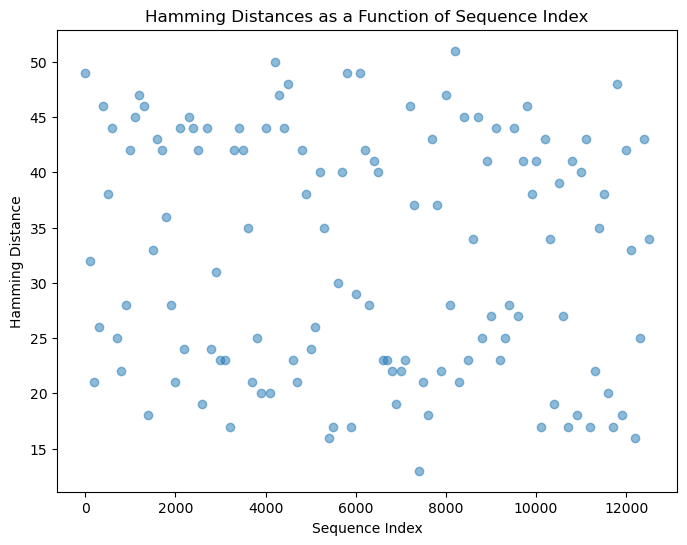

Vectorized Hamming distances (every f{step_size}th sequence): [49 32 21 26 46 38 44 25 22 28 42 45 47 46 18 33 43 42 36 28 21 44 24 45
 44 42 19 44 24 31 23 23 17 42 44 42 35 21 25 20 44 20 50 47 44 48 23 21
 42 38 24 26 40 35 16 17 30 40 49 17 29 49 42 28 41 40 23 23 22 19 22 23
 46 37 13 21 18 43 37 22 47 28 51 21 45 23 34 45 25 41 27 44 23 25 28 44
 27 41 46 38 41 17 43 34 19 39 27 17 41 18 40 43 17 22 35 38 20 17 48 18
 42 33 16 25 43 34]
Average Hamming distance (every 1000th sequence): 32.53968253968254
Vectorized Hamming distances (train vs test): [34 32 45 ... 48 46 42]
Average Hamming distance (train vs test): 39.522867076758494


In [2]:
filename = 'generated_sequences_40000'
cwd = '/Users/marzioformica/Desktop/EPFL/Master/MA2/Labo/my_project/PLM-gen-DCA/Attention-DCA-main'
output_file = cwd + f'/CODE/AttentionDCA_python/src/PLM/generated_sequences/{filename}.npy'
family = 'jdoms_bacteria_train2'
filename = cwd + f'/CODE/DataAttentionDCA/jdoms/{family}.fasta'

# Get the raw letter sequences from the FASTA file
folder_name = "/Users/marzioformica/Desktop/EPFL/Master/MA2/Labo/my_project/PLM-gen-DCA/Attention-DCA-main/CODE/AttentionDCA_python/src/my_saved_data"
os.makedirs(folder_name, exist_ok=True)
file_path = os.path.join(folder_name, "plm_generated_V21_gap_seqs_jdom_40000_exp_pos_init_mod.txt")
seq_aa=np.loadtxt(file_path,dtype=int)
gen_sequences = seq_aa
#gen_sequences = np.load(output_file)
train_sequences = sequences_from_fasta(filename)
# Convert to numeric sequences
train_sequences_num = np.array([letters_to_nums(seq) for seq in train_sequences])

# Test sequences
family = 'jdoms_bacteria_test2'
filename = cwd + f'/CODE/DataAttentionDCA/jdoms/{family}.fasta'
# Initialize a list to store the sequences
test_sequences = sequences_from_fasta(filename)
test_sequences_num = np.array([letters_to_nums(seq) for seq in test_sequences])

print("train sequences: ", np.shape(train_sequences_num))
print("test sequences: ", np.shape(test_sequences_num))
print("gen sequences: ", np.shape(gen_sequences))

# --- Select every 1000th sequence ---
# Define the index range
start_idx = 2000
end_idx = 40000
step_size = 100  # Select every 1000th sequence

# Select sequences between start and end, with step
gen_sequences_subset = gen_sequences[start_idx:end_idx:step_size]
train_sequences_num_subset = train_sequences_num[start_idx:end_idx:step_size]

# --- Calculate Hamming distances ---
distances = vectorized_hamming_distance(gen_sequences_subset, train_sequences_num_subset)

# --- Plot the results ---
# Plot Hamming distances as a function of sequence index
plt.figure(figsize=(8, 6))
plt.scatter(np.arange(0, len(distances) * step_size, step_size), distances, alpha=0.5)
plt.title("Hamming Distances as a Function of Sequence Index")
plt.xlabel("Sequence Index")
plt.ylabel("Hamming Distance")
plt.show()

# Print out some statistics
print("Vectorized Hamming distances (every f{step_size}th sequence):", distances)
print("Average Hamming distance (every 1000th sequence):", np.mean(distances))

distance_test_train = vectorized_hamming_distance(train_sequences_num, test_sequences_num)
print("Vectorized Hamming distances (train vs test):", distance_test_train)
print("Average Hamming distance (train vs test):", np.mean(distance_test_train))




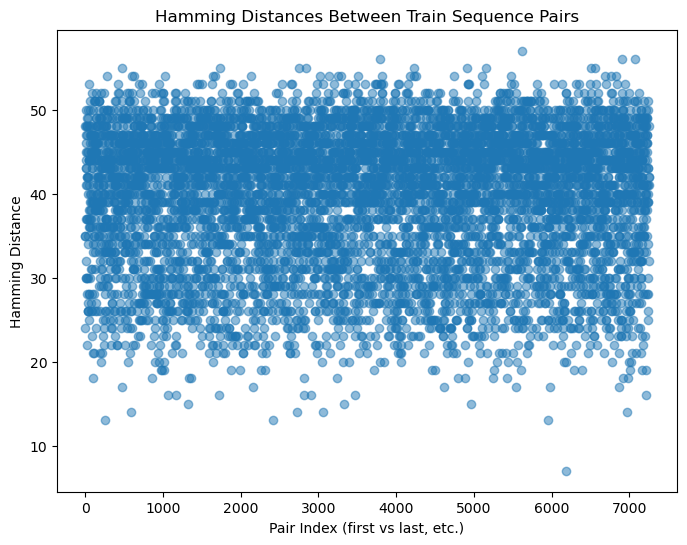

Vectorized Hamming distances (within train pairs): [35 35 48 ... 41 42 48]
Average Hamming distance (within train pairs): 39.554957936836296


In [3]:

# --- Compare Hamming distances within train sequences (first vs last, second vs second-last, etc.) ---
# Determine number of pairs (half the number of sequences)
num_pairs = train_sequences_num.shape[0] // 2

# Pair first with last, second with second last, etc.
train_seq_subset_1 = train_sequences_num[:num_pairs]
train_seq_subset_2 = train_sequences_num[-num_pairs:][::-1]  # Reverse last part

# Compute Hamming distances
distance_within_train = vectorized_hamming_distance(train_seq_subset_1, train_seq_subset_2)

# Plot
plt.figure(figsize=(8, 6))
plt.scatter(np.arange(num_pairs), distance_within_train, alpha=0.5)
plt.title("Hamming Distances Between Train Sequence Pairs")
plt.xlabel("Pair Index (first vs last, etc.)")
plt.ylabel("Hamming Distance")
plt.show()

# Print stats
print("Vectorized Hamming distances (within train pairs):", distance_within_train)
print("Average Hamming distance (within train pairs):", np.mean(distance_within_train))

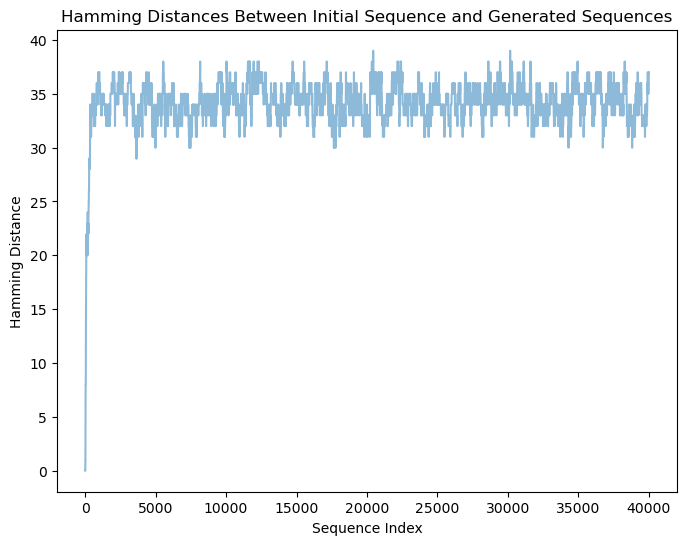

Average Hamming distance: 34.19177020574486


In [4]:
import numpy as np
import matplotlib.pyplot as plt

initial_sequence = gen_sequences[0]  # Example, should be the initial sequence you are working with

# Compute Hamming distances sequentially
hamming_distances = []
for seq in gen_sequences:
    distance = hamming_dist(initial_sequence, seq)
    hamming_distances.append(distance)

# Convert the list of distances into a numpy array
hamming_distances = np.array(hamming_distances)

# Plot Hamming distances as a function of sequence index
plt.figure(figsize=(8, 6))
plt.plot(np.arange(len(hamming_distances)), hamming_distances, alpha=0.5)
plt.title("Hamming Distances Between Initial Sequence and Generated Sequences")
plt.xlabel("Sequence Index")
plt.ylabel("Hamming Distance")
plt.show()

# Print some statistics
print(f"Average Hamming distance: {np.mean(hamming_distances)}")

## Correlations

In [6]:
def energy_corr_step(energy_seq,cor_step):
    avr_en=np.mean(energy_seq)
    first=energy_seq[:-cor_step]-avr_en
    second=hamming_distances[cor_step:]-avr_en
    numerator=np.mean(first*second)
    denomin=np.sqrt(np.mean(first**2)*np.mean(second**2))
    return numerator/denomin

def energy_corr_array(energy_seq,max_cor_step):
    list_corr=[]
    for i in range(max_cor_step):
        list_corr.append(energy_corr_step(energy_seq,i+1))
    return np.array(list_corr)

corr_energy_plot=energy_corr_array(hamming_distances,int(len(hamming_distances)/5))

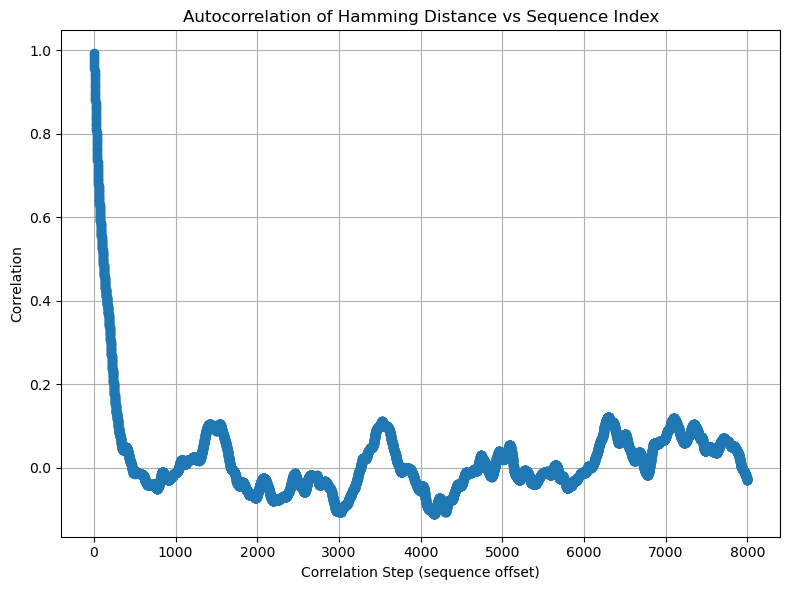

In [7]:
# X-axis: correlation step (1 to max_cor_step)
x_vals = np.arange(1, len(corr_energy_plot) + 1)

# Plot
plt.figure(figsize=(8, 6))
plt.plot(x_vals, corr_energy_plot, marker='o', linestyle='-')
plt.title("Autocorrelation of Hamming Distance vs Sequence Index")
plt.xlabel("Correlation Step (sequence offset)")
plt.ylabel("Correlation")
plt.grid(True)
plt.tight_layout()
plt.show()